SETTING FILE PATH AND IMPORTING DATA

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import math
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.preprocessing as preprocessing

In [2]:
print(os.path.abspath('../'))

/home/faisal/Desktop/karachi.ai course/machine learning]


In [3]:
file_path = os.path.abspath('../class12/')

In [4]:
print(file_path)

/home/faisal/Desktop/karachi.ai course/machine learning]/class12


In [5]:
data_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

EDA

In [6]:
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data_df.shape

(7043, 21)

In [8]:
#Removing customer ID column
col = ['customerID']
data_df.drop(col, inplace=True, axis=1)

In [9]:
data_df.shape

(7043, 20)

In [10]:
#checing data types
data_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#converting TotalCharges from object to float
data_df["TotalCharges"] = data_df.TotalCharges.convert_objects(convert_numeric=True)

/home/faisal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [12]:
#Again checking data types
data_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
#Checking null values
data_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#Replacing null values with mean values of TotalCharges
data_df["TotalCharges"].fillna(data_df["TotalCharges"].mean(), inplace=True)

In [15]:
#Checking null values Again
data_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
#Converting gender values to numerical (Male = 1, Female = 0)
gender_val = {"Male" : 1, "Female": 0}
data_df["gender"] = data_df["gender"].map(gender_val)

In [17]:
data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
data_df.dtypes

gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#Converting Yes and No using above method (Yes=1, No= 0)
for col in data_df:
    if data_df.dtypes[column] == np.object:
        data_df[col] = [1 if x == "Yes" else 0 for x in data_df[col]]

In [19]:
#Above code gives wrong result so i need to do some manual task 
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
       'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    data_df[col] = [1 if x == "Yes" else 0 for x in data_df[col]] 
    
    #data.df[col] = [1 if x == "Yes" else 0 for x in data[col]] 

In [20]:
 data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [21]:
data_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

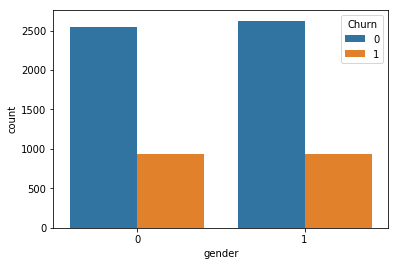

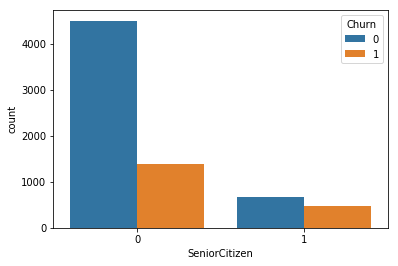

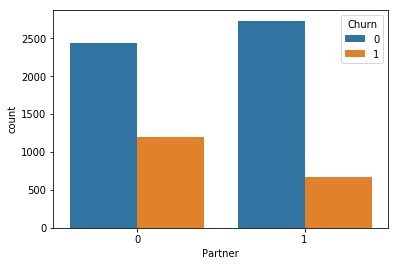

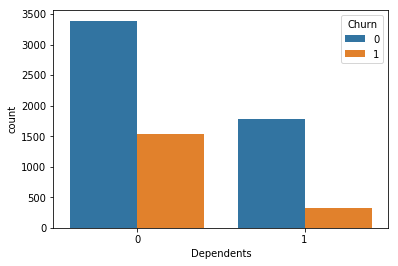

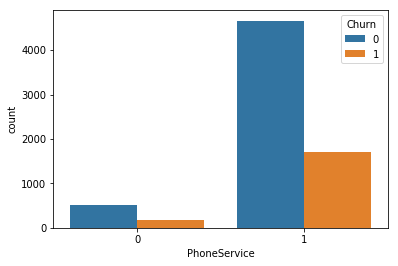

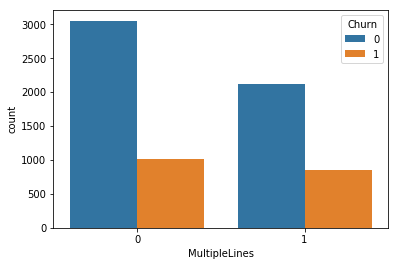

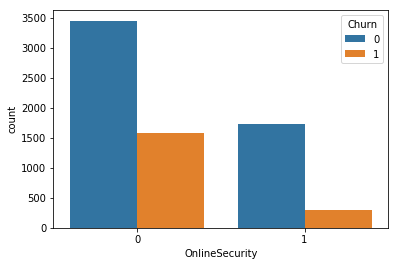

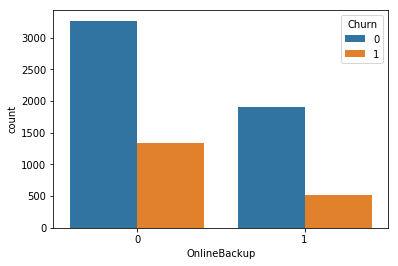

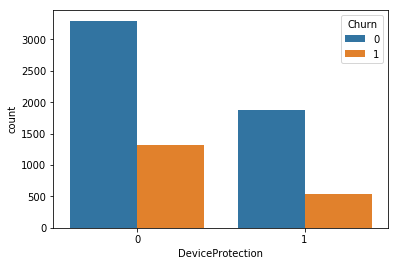

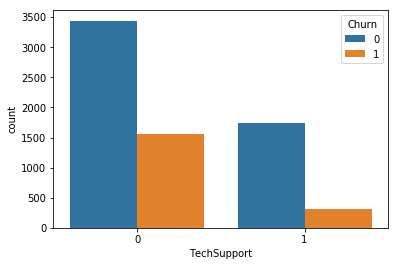

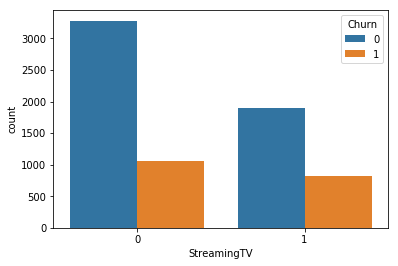

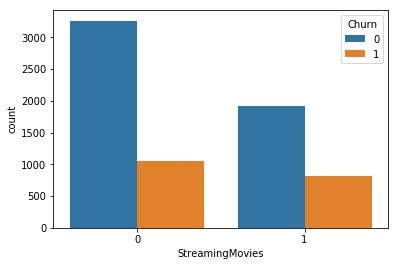

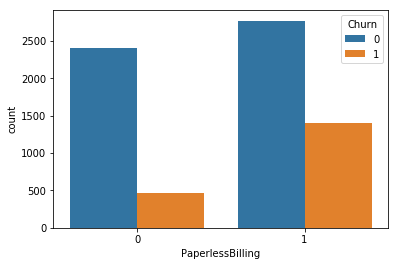

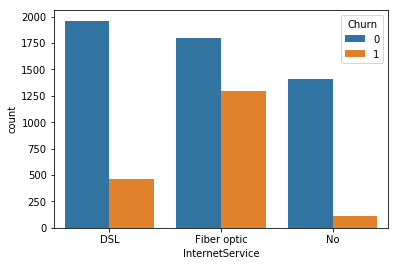

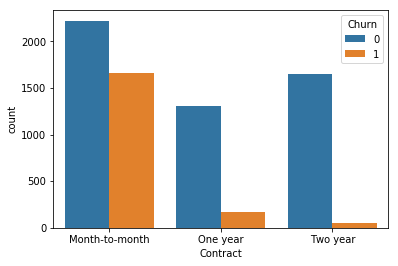

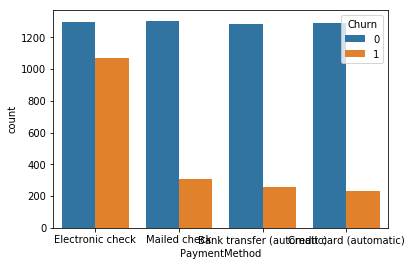

In [22]:
#Plotting bar graph between Churn and some columns
columns = ['gender','SeniorCitizen','Partner', 'Dependents', 'PhoneService' ,'MultipleLines' ,'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','InternetService','Contract','PaymentMethod']
for x in columns:
    sns.countplot(data_df[x], hue=data_df['Churn']) 
    plt.show()
    
#(Yes=1, No= 0)
#male =1 , female = 0

In [23]:
#some analysis by analyzing above graphs:
"""
1)Values of Churn is almost equal between male and female.
2)There is a variation in churns in senior citizen, more senior = less churn.
3)Low churn value if customer is partners.
4)Low churn value if customer is dependents.
5)Customers having phone services have higher churn values as compare to those who don't have phone service.
6)Less variability of Churn is seen between customers having and not having multiples lines.
7)Customers with no online security,onlinebackup, DeviceProtection and techsupport have high churn values.
8)Customers who streamTV and streamMovies have customers who donot perform these actions have low variability of chyrn betwen them.
9)Customer with paperlessBilling also have high churn values.
10) Customewrs with fiberoptics, month-to-month contract and electronic check have high churn as compare to others.

"""

"\n1)Values of Churn is almost equal between male and female.\n2)There is a variation in churns in senior citizen, more senior = less churn.\n3)Low churn value if customer is partners.\n4)Low churn value if customer is dependents.\n5)Customers having phone services have higher churn values as compare to those who don't have phone service.\n6)Less variability of Churn is seen between customers having and not having multiples lines.\n7)Customers with no online security,onlinebackup, DeviceProtection and techsupport have high churn values.\n8)Customers who streamTV and streamMovies have customers who donot perform these actions have low variability of chyrn betwen them.\n9)Customer with paperlessBilling also have high churn values.\n10) Customewrs with fiberoptics, month-to-month contract and electronic check have high churn as compare to others.\n\n"

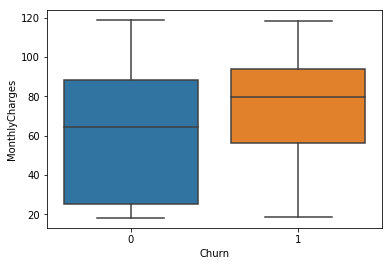

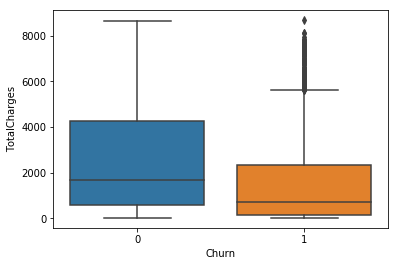

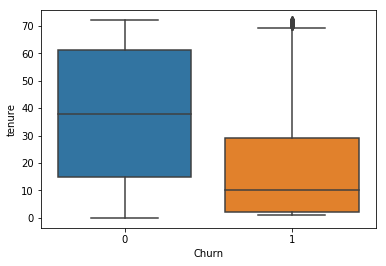

In [24]:
#box plot between continuous and churn values
for col in ('MonthlyCharges','TotalCharges','tenure'):
    
    sns.boxplot(x='Churn', y=col, data=data_df) 
  
    plt.show()

In [25]:
"""
1)customers having churn showed high monthly charges.
2)customers having churn showed low total charges.
3)Customers having churn showed a decline with increase in tenure.
"""

'\n1)customers having churn showed high monthly charges.\n2)customers having churn showed low total charges.\n3)Customers having churn showed a decline with increase in tenure.\n'

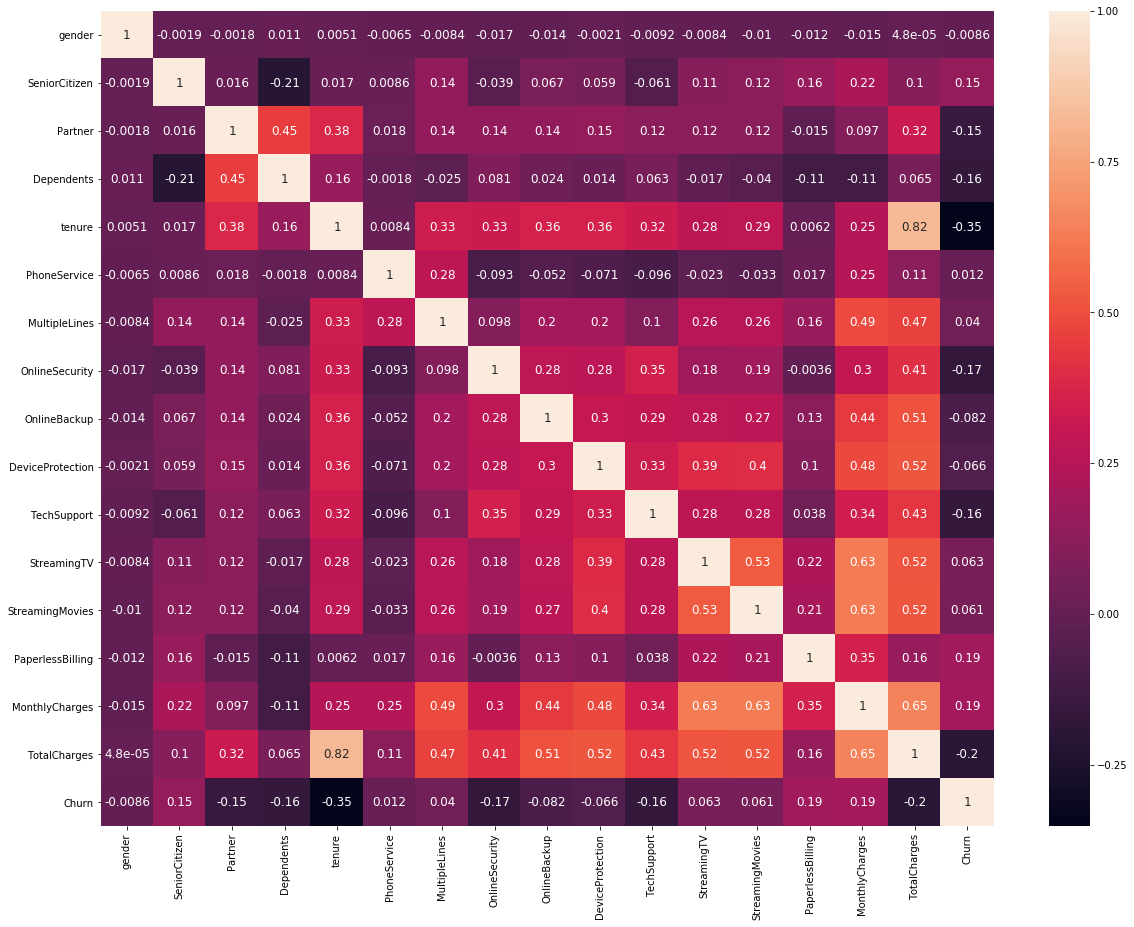

In [26]:
#identifying multicolinearity
corr = data_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [27]:
#tenure vs total charges shows high multicolinearity (0.82)
#monthly charges vs total charges shows high multicolinearity (0.65)
#drop total charges

In [28]:
#Removing some columns.
col = ['TotalCharges','Contract','PaymentMethod','InternetService']
data_df.drop(col, inplace=True, axis=1)

In [29]:
data_df.shape

(7043, 16)

#Logistic Regression

In [32]:
#Splitting in test and train
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
train, test = train_test_split(data_df, test_size = 0.25)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Applying Logistic regression
model = LogisticRegression()
result = model.fit(train_x, train_y)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(test_x)
# Print the prediction accuracy
print (metrics.accuracy_score(test_y, prediction_test))

In [ ]:
model